# 6_6.1/// what is Statistics
We can talk about the field of statistics, which is the practice and study of collecting and analyzing data. We can also talk about a summary statistic, which is a fact about or summary of some data, like an average or a count.

## Types of statistics
There are 2 main branches of statistics: **descriptive statistics and inferential statistics.** Descriptive statistics focuses on describing and summarizing the data at hand. After asking four friends how they get to work, we can see that 50% of them drive to work, 25% ride the bus, and 25% bike. These are examples of descriptive statistics. Inferential statistics uses the data at hand, which is called sample data, to make inferences about a larger population. We could use inferential statistics to figure out what percent of people drive to work based on our sample data.
## Types of Data
**1.Numeric/Quantitive** data can be further separated into continuous and discrete data. Continuous numeric data is often quantities that can be measured, like speed or time. Discrete numeric data is usually count data, like number of pets or number of packages shipped. **2.Categorical data** can be nominal or ordinal. Nominal categorical data is made up of categories with no inherent ordering, like marriage status or country of residence. Ordinal categorical data has an inherent order, like a survey question where you need to indicate the degree to which you agree with a statement.

# 6_6.2///Measures of center
<u><i>mean:<i></u> avg <br>
<u><i>median:<i></u>The median is the value where 50% of the data is lower than it, and 50% of the data is higher.<br>
<u><i>mode:</i></u>The mode is the most frequent value in the data.<br>
<u><i>Skew:<i></u>When data is skewed, the mean and median are different. The mean is pulled in the direction of the skew, so it's lower than the median on the left-skewed data, and higher than the median on the right-skewed data. Because the mean is pulled around by the extreme values, it's better to use the median since it's less affected by outliers.  

In [1]:
import numpy as np
import pandas as pd
food_consumption=pd.read_csv('G:\\datacamp\\6_6. Introduction to Statistics\\food_consumption.csv')

### E/mean and median
#### Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
#### Calculate the mean and median of kilograms of food consumed per person per year for both countries.

In [2]:
print(food_consumption.info())

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1430 non-null   int64  
 1   country        1430 non-null   object 
 2   food_category  1430 non-null   object 
 3   consumption    1430 non-null   float64
 4   co2_emission   1430 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 56.0+ KB
None
Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_5212\1628958847.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.mean())
C:\Users\hp\AppData\Local\Temp\ipykernel_5212\1628958847.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.median())
C:\Users\hp\AppData\Local\Temp\ipykernel_5212\1628958847.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.mean())
C:\Users\hp\AppData\Local\Temp\ipykernel_5212\1628958847.py:15: Future

#### Subset food_consumption for rows with data about Belgium and the USA.
#### Group the subsetted data by country and select only the consumption column.
#### Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [3]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.median,np.mean]))

         median       mean
country                   
Belgium   12.59  42.132727
USA       14.58  44.650000


### E/Mean vs Median
#### Subset food_consumption to get the rows where food_category is 'rice'.
#### Create a histogram of co2_emission for rice and show the plot.
Remember that left-skewed means the data has a tail on the left side and is piled up higher on the right.

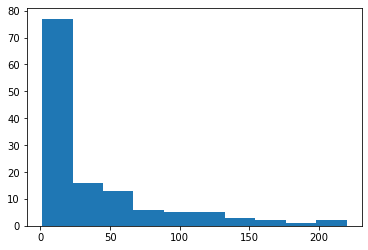

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [4]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
#plt.hist(rice_consumption['co2_emission'])
plt.hist(rice_consumption.co2_emission)
plt.show()

# Calculate mean and median of co2_emission with .agg()
#print(rice_consumption['co2_emission'].agg([np.mean,np.median]))        ##### .agg
print(rice_consumption.co2_emission.agg([np.mean,np.median])) 

## 6_6.3// Measures of spread
### Variance
It describes how spread apart or close together the data points are. Just like measures of center, there are a few different measures of spread. 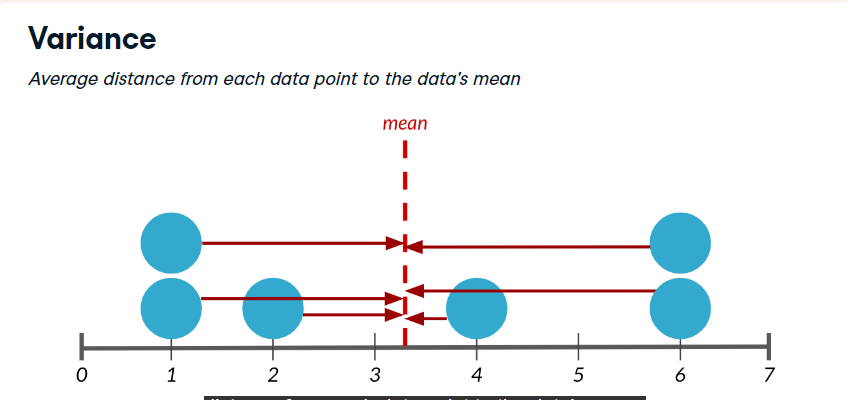 


how to calculate variance?? <br>
Step1= substract mean from each data point <br>
step2= square each distance<br>
step3= sum all the distances<br>
step4= divide by number of data points-1<br>
<br>
The higher the variance, the more spread out the data is. We should set the **ddof** argument to 1. If we don't specify ddof equals 1, a slightly different formula is used to calculate variance that should only be used on a full population, not a sample.
<br>
### Standard deviation 
It is a number that describes how spread out the values are.
A low standard deviation means that most of the numbers are close to the mean (average) value.
A high standard deviation means that the values are spread out over a wider range.
<br>
### Mean absolute deviation
Mean absolute deviation takes the absolute value of the distances to the mean, and then takes the mean of those differences. np.mean(np.abs())<br>While this is similar to standard deviation, it's not exactly the same. Standard deviation squares distances, so longer distances are penalized more than shorter ones, while mean absolute deviation penalizes each distance equally. One isn't better than the other, but SD is more common than MAD.
### Quantiles
np.quantile(df[''],[0,0.2,0.5,o.7,0.85])<br>
np.quantile(df[''],np.linsapce(start,stop,num)),,,(0,1,5)

### Interquartile range (IQR)
from scipy.stats import iqr. or we can use quantile
### Outliers

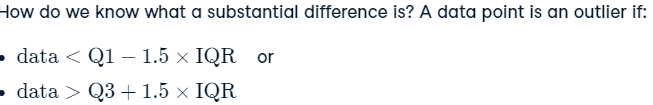

In [5]:
# Calculate the quartiles of the co2_emission column of food_consumption.
#print(np.quantile(food_consumption['co2_emission'],[0,.25,.5,.75,1]))
print(np.quantile(food_consumption.co2_emission,[0,.25,.5,.75,1]))
# Calculate the quintiles of co2_emission 10 pieces
print('22222')
print(np.quantile(food_consumption['co2_emission'],[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))
print('33333')
print(np.quantile(food_consumption['co2_emission'],np.linspace(.1,1,10)))

[   0.        5.21     16.53     62.5975 1712.    ]
22222
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]
33333
[6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01 2.55900e+01
 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### E//Variance and standard deviation
Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations.<br> For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


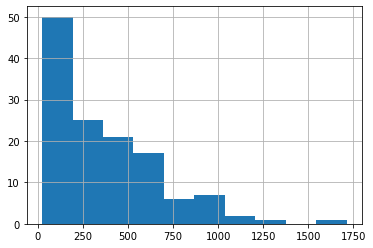

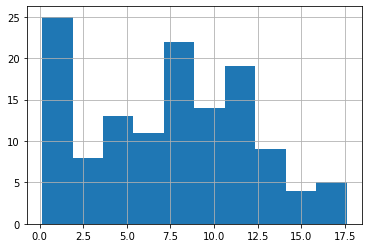

In [6]:

# Print variance and sd of co2_emission for each food_category
#print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var,np.std]))
print(food_consumption.groupby('food_category').co2_emission.agg([np.var,np.std]))
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef'].co2_emission.hist()    ##### got it wrong by myself
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()


### E//Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. In this exercise, you'll calculate IQR and use it to find some outliers. pandas as pd and numpy as np are loaded and food_consumption is available.
##### Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country

In [7]:
print(food_consumption.head())

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96
country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


##### Compute the first and third quartiles of emissions_by_country and store these as q1 and q3. Calculate the interquartile range of emissions_by_country and store it as iqr.

In [8]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,.25)
q3 = np.quantile(emissions_by_country,.75)
iqr = q3-q1
print(iqr)

664.4925000000001


##### Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

In [9]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

##### Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [10]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## 6_6.2/// Random Numbers and Probability
### 6_6.2.1/// What are the chances?
We can measure the chances of an event using probability<br>
probability=(n ways a event can happen)/(Total possible outcome). If you flip a coin the chances for head=1(event)/2(possible outcome)=50% <br>

<u><i>Seed:</i></u> The seed is a number that Python's random number generator uses as a starting point, so if we orient it with a seed number, it will generate the same random value each time. <br>np.random.seed(10) always gives same number for np.sample ()/ To change it use replace=True for np.sample(5,replace=True). 5 is for how many times to tke sample.</br>
<u><i>Independent and Dependent event:</i></u> Imagine there are four people for picing for a meeting.Events are **independent** if the probability of the second event isn't affected by the outcome of the first event. For example, if we're sampling with replacement, the probability that Claire is picked second is 25%, no matter who gets picked first. In general, when sampling with replacement, each pick is independent.<br>events are considered **dependent** when the outcome of the first changes the probability of the second.<u> If we sample without replacement, the probability that Claire is picked second depends on who gets picked first.If Claire is picked first, there's 0% probability that Claire will be picked second.If someone else is picked first, there's a (1/3)33% probability Claire will be picked second</u>
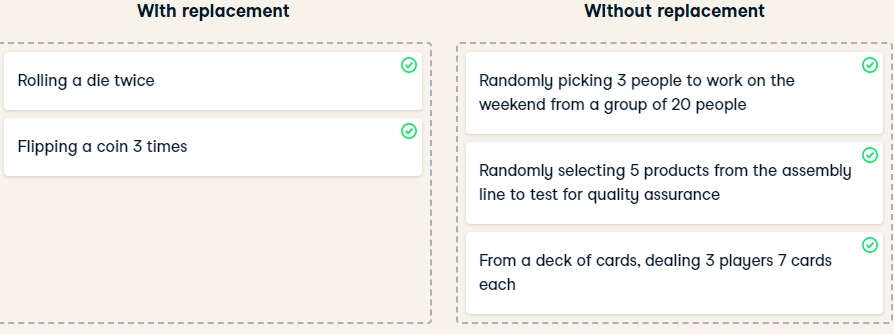

#### E//Calculating probabilities
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.
##### Count the number of deals Amir worked on for each product type and store in counts.
##### Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs
##### If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C

In [26]:
amir_deals=pd.read_csv('G:\\datacamp\\6_6. Introduction to Statistics\\amir_deals.csv')
counts = amir_deals['product'].value_counts()
#counts = amir_deals.product.value_counts()
print(counts)
print(counts.sum())

# Calculate probability of picking a deal with each product
probs = counts/counts.sum()
print(probs)
15/counts.sum()

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64
178
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


0.08426966292134831

#### E//Sampling deals
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

##### Set the random seed to 24.
##### Take a sample of 5 deals without replacement and store them as sample_without_replacement

In [12]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5,replace=False)
print(amir_deals.sample())
print(amir_deals.sample(3))
print(sample_without_replacement)
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5,replace=True)
print(sample_with_replacement)
print(amir_deals.sample())

     Unnamed: 0    product   client status   amount  num_users
108         109  Product H  Current    Won  3608.69         56
     Unnamed: 0    product   client status   amount  num_users
156         157  Product B  Current    Won  6204.95         58
137         138  Product A  Current    Won  5145.01         89
158         159  Product A  Current    Won  4665.88         20
     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
159         160  Product B  Current    Won  1676.09         29
120         121  Product D  Current   Lost  8180.81         96
79           80  Product B  Current    Won  4866.12    

What type of sampling is better to use for this situation? ans: without replacement

## 6_6.2.2// Discrete distributions
<u><i>**probability distribution:**</i></u>A probability distribution describes the probability of each possible outcome in a scenario.consider a rolling dice, it has six sides. Every side  has a possibility of (1/6). A probability distribution describes the probability of each possible outcome in a scenario. <br>
<u><i>**expected value:**</i></u>hich is the mean of a distribution. for role===(1* 1/6)+(2* 1/6)+...+(6* 1/6),. This is Fair die.
lets this dice num 2 has turned to dice 3.then there are two threes(1/6+1/6=1/3) then=== (1* 1/6)+(2* 0)+(3* 1/3)+(4* 1/6)+(5* 1/6)+(6* 1/6).  This is uneven die<br>
The probability distributions you've seen so far are both discrete probability distributions, since they represent situations with discrete outcomes. When all outcomes have the same probability, like a fair die(1st case), this is a special distribution called a discrete uniform distribution.<br>
<u><i> **Law of large numbers:** </i></u>which is the idea that as the size of your sample increases, the sample mean will approach the theoretical mean.<br>
### E///Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.
Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. pandas is loaded as pd, numpy is loaded as np, and matplotlib.pyplot is loaded as plt.
##### Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

In [13]:
restaurant_groups=pd.DataFrame({'group_id':['A','B','C','D','E','F','G','H','I','J'],'group_size':[2,4,6,2,2,2,3,2,4,2]})
restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


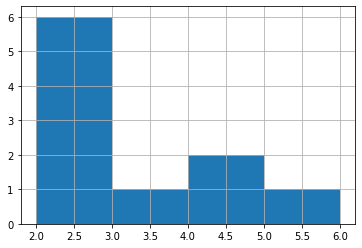

In [14]:
# Create a histogram of restaurant_groups and show pl
restaurant_groups.group_size.hist(bins=[2, 3, 4, 5, 6])
plt.show()

##### Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.      2//Reset the index of size_dist.        3//Rename the columns of size_dist to group_size and prob.

In [15]:
print(restaurant_groups[['group_size']].value_counts())
print(restaurant_groups['group_size'].value_counts())
print(type(restaurant_groups['group_size']))

group_size
2             6
4             2
3             1
6             1
dtype: int64
2    6
4    2
6    1
3    1
Name: group_size, dtype: int64
<class 'pandas.core.series.Series'>


In [16]:
# Create probability distribution
#size_dist = restaurant_groups['group_size'].sum()/ restaurant_groups[:].count()
size_dist=restaurant_groups[['group_size']].value_counts()/ restaurant_groups.shape[0]   ###******
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns= (['group_size', 'prob'])


print(size_dist)
#print(restaurant_groups['group_size'].sum())
#print(restaurant_groups[['group_size']].value_counts())
print(restaurant_groups)
print(restaurant_groups[['group_size']].value_counts()/ restaurant_groups.shape[0])

   group_size  prob
0           2   0.6
1           4   0.2
2           3   0.1
3           6   0.1
  group_id  group_size
0        A           2
1        B           4
2        C           6
3        D           2
4        E           2
5        F           2
6        G           3
7        H           2
8        I           4
9        J           2
group_size
2             0.6
4             0.2
3             0.1
6             0.1
dtype: float64


In [53]:
print(restaurant_groups['group_size'].sum())
print(restaurant_groups[['group_size']].value_counts())

29
group_size
2             6
4             2
3             1
6             1
dtype: int64


^^ size_dist represens every size and group er probability 2.9. 2,4,3,6 these 4 types of group
##### e3Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

In [17]:
expected_value_bad=(2*.6)+(4*.2)+(3*.1)+(6*.1) #### which is not good!! emne koto korba??
#size_dist['prob']=size_dist['prob'].astype(int)
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
expected_value


2.9

##### e4Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [18]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size']>=4]
print(groups_4_or_more)
# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

   group_size  prob
1           4   0.2
3           6   0.1
0.30000000000000004


### 6_6.2.3///Continuous distributions
We can use discrete distributions to model situations that involve discrete or countable variables, but how can we model continuous variables?????lets assume,The city bus arrives once every twelve minutes, so if you show up at a random time, you could wait anywhere from 0 minutes if you just arrive as the bus pulls in, up to 12 minutes if you arrive just as the bus leaves.<br>
Let's model this scenario with a probability distribution. There are an infinite number of minutes we could wait since we could wait 1 minute, 1-point-5 minutes, 1-point-53 minutes, and so on, so we can't create individual blocks like we could with a discrete variable.Instead, we'll use a continuous line to represent probability. The line is flat since there's the same probability of waiting any time from 0 to 12 minutes. This is called the continuous uniform distribution.
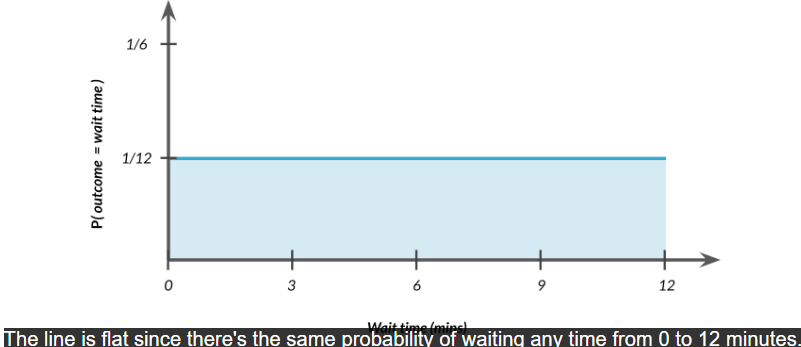
#### Which distribution?
At this point, you've learned about the two different variants of the uniform distribution: the discrete uniform distribution, and the continuous uniform distribution. In this exercise, you'll decide which situations follow which distribution. see= https://stattrek.com/probability-distributions/discrete-continuous

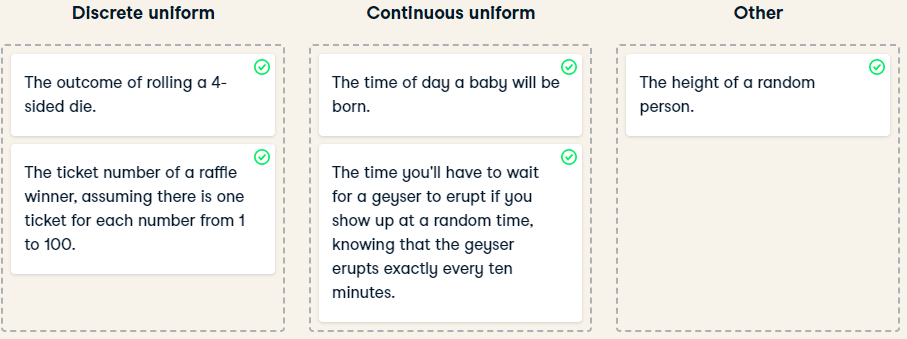

##### e1//Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. 

In [19]:
# Import uniform from scipy.stats
from scipy.stats import uniform
help(uniform)
print('*****uniform.rvs****')
help(uniform.rvs)

Help on uniform_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.uniform_gen object>
    A uniform continuous random variable.
    
    In the standard form, the distribution is uniform on ``[0, 1]``. Using
    the parameters ``loc`` and ``scale``, one obtains the uniform distribution
    on ``[loc, loc + scale]``.
    
    As an instance of the `rv_continuous` class, `uniform` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, s

In [20]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,0,30)   ### 5, lower limit 0, upper limit 30
print(prob_less_than_5)
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(30,0,30)-uniform.cdf(5,0,30) ###Cumulative distribution function.
prob_greater_than_5_2=1-uniform.cdf(5,0,30)
print(prob_greater_than_5)
print(prob_greater_than_5_2)
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.8333333333333334
0.3333333333333333


#### e////Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

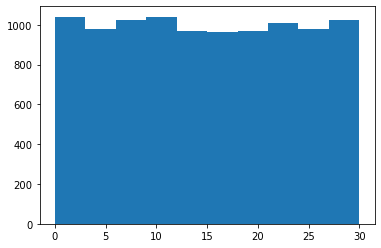

In [21]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=10000)       ### minium valye,maximum value, num of random value we want to generate
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

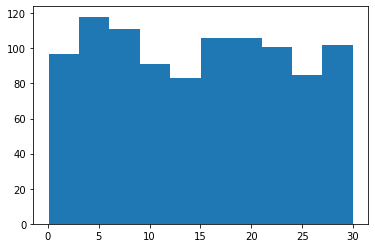

In [22]:
np.random.seed(334)
# Generate 1000 wait times between 0 and 30 mins
wait_times2 = uniform.rvs(0, 30, size=1000)
# Create a histogram of simulated times and show plot
plt.hist(wait_times2)
plt.show()

Superb simulating! Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

### 6_6.2.4/// The binomial distribution
head\tail==success\failure==win\loss==1\0<br>by importing binom from scipy.stats and using the binom.rvs function.<u>binom.rvs(num of coins,probability of sucess/win/heads,size=num of trails)</u><br><i>**Binomial Distribution:**</i> The binomial distribution describes the probability of the number of successes in a sequence of independent trials. In other words, it can tell us the probability of getting some number of heads in a sequence of coin flips. Note that this is a discrete distribution since we're working with a countable outcome. The binomial distribution can be described using two parameters, n and p. n represents the total number of trials being performed, and p is the probability of success. n and p are also the third and second arguments of binom-dot-rvs.
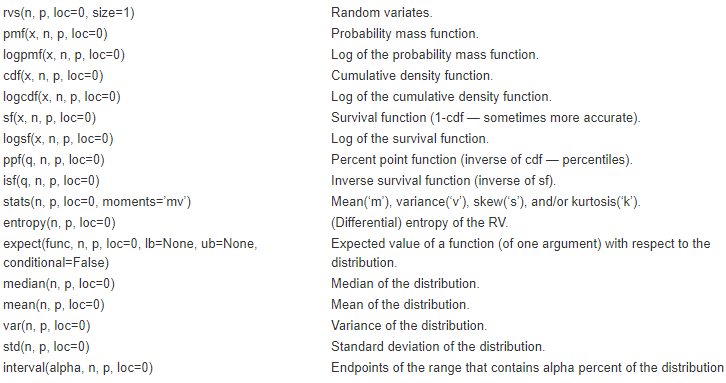

<u>What's the probability of 7 heads? p(heads=7)</u><br>
binom.pmf(num of head,num of trails,probability of head) binom.pmf(7,10,.5)<br><u>less than or equal to 7</u><br>binom.cdf gives the probability of getting a number of successes less than or equal to the first argument.binom.cdf(7,10,.5). so what if we want to get the probability of higher than 7?? 1-binom.cdf(7,10,.5)<br>**Expected Value:** p*n 


In [23]:
from scipy.stats import binom
import numpy as np
help(binom)

Help on binom_gen in module scipy.stats._discrete_distns:

<scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.
    
    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inve

#### E1// Simulating sales deals
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.
###### e2//Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
###### e3//Simulate a typical week of Amir's deals, or one week of 3 deals.
###### e4//Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.Print the mean number of deals he won per week.

In [27]:
# Set random seed to 10
np.random.seed(10)
# Simulate a single deal  e2
print(binom.rvs(1, .3, size=1))
# Simulate 1 week of 3 deals   e3
print(binom.rvs(3,.3,size=1))
# Simulate 52 weeks of 3 deals   e4
deals = binom.rvs(3,.3,size=52)
print(deals)
# Print mean deals won per week
print(np.mean(deals))     ### per week lavh kore .84 deal

[1]
[0]
[1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0
 1 1 2 0 2 1 1 0 2 0 0 1 0 2 0]
0.8461538461538461


#### E2//Calculating binomial probabilities
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.
###### e1/What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.
###### e2//What's the probability that Amir closes 1 or fewer deals in a week?
###### e3//What's the probability that Amir closes more than 1 deal?

In [28]:
# Probability of closing 3 out of 3 deals    e1
prob_3 = binom.pmf(3,3,.3)
print(prob_3)
# Probability of closing <= 1 deal out of 3 deals         e2
prob_less_than_or_equal_1 = binom.cdf(1,3,.3)
print(prob_less_than_or_equal_1)
# Probability of closing > 1 deal out of 3 deals     e3
prob_greater_than_1 = 1-binom.cdf(1,3,.3)
print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


#### E3//How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations
###### Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
###### Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%
###### Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [29]:
# Expected number won with 30% win rate
won_30pct = 3 * .3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3*.25
print(won_25pct)

# Expected number won with 35% win rate     
won_35pct = 3*.35
print(won_35pct)     ### mane 35% hoile ekta deal close korte parbe

0.8999999999999999
0.75
1.0499999999999998


## 6_6.3.1// The normal distribution(continuous distribution)
 Its shape is commonly referred to as a "bell curve". It has some important properties-Symmetrical,,,area=1,,,curve never hits 0//The normal distribution is described by its mean and standard deviation. When a normal distribution has mean 0 and a standard deviation of 1, it's a special distribution called the standard normal distribution.<br>For the normal distribution, 68% of the area is within 1 standard deviation of the mean.,,,,95% of the area falls within 2 standard deviations of the mean,,,,,,and 99.7% of the area falls within three standard deviations. This is sometimes called the 68-95-99.7 rule.
 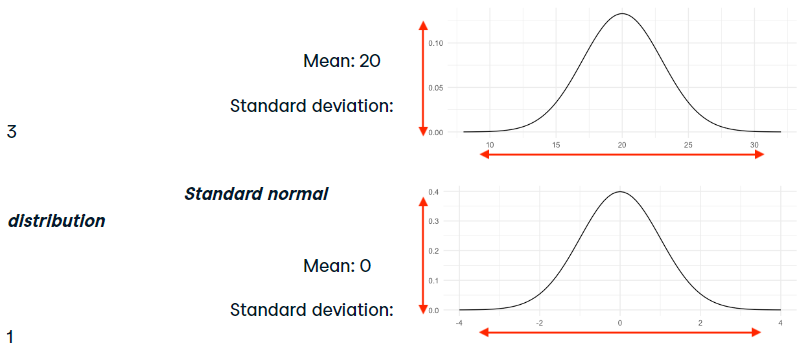

<u>What percent of women are shorter than 154 cm or between 157-154 or highesr than sth??</u><i>norm.cdf(x,mean,std)</i><br>
<u>what height 70/80/90% women are shorter at?</u><i>norm.ppf(.x(.7/.8/.9),mean,std)</i><br> For random numm generators <i>norm.rvs(mean,std.size=n)</i>

In [33]:
from scipy.stats import norm
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

#### E//Distribution of Amir's sales
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.

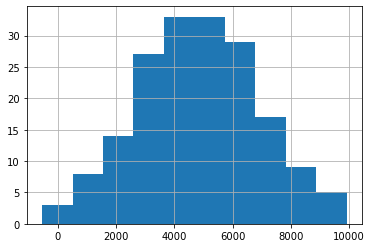

In [32]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

#### E// Probabilities from the normal distribution
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.
###### What's the probability of Amir closing a deal worth less than 7500? 
###### What's the probability of Amir closing a deal worth more than 1000?
###### What's the probability of Amir closing a deal worth between 3000 and 7000?
###### What amount will 25% of Amir's sales be less than?

In [34]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)
print(prob_less_7500)
# Probability of deal > 1000
prob_over_1000 = 1-norm.cdf(1000,5000,2000)
print(prob_over_1000)
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000)-norm.cdf(3000,5000,2000)
print(prob_3000_to_7000)
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(.25,5000,2000)
print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


#### E// Simulating sales under new market conditions
The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

###### Currently, Amir's average sale amount is 5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.
###### Amir's current standard deviation is 2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
###### Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
###### Plot the distribution of the new_sales amounts using a histogram and show the plot.

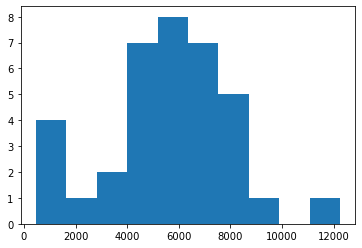

In [36]:
# Calculate new average amount
new_mean = 5000*1.2
# Calculate new standard deviation
new_sd = 2000*1.3
# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)
# Create histogram and show
plt.hist(new_sales)
plt.show()

##### Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

norm from scipy.stats is imported.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [38]:
print(1-norm.cdf(1000,5000,2000))
print(1-norm.cdf(1000,6000,2600))

0.9772498680518208
0.9727648049862613


## 6_6.3.2//The central limit theorem
a sampling distribution will approach a normal distribution as the number of trials increases. In our example, the sampling distribution became closer to the normal distribution as we took more and more sample means. It's important to note that the central limit theorem only applies when samples are taken randomly and are independent, with replacement.<br>Standard deviation,mean.proportion can be get.,,,,Estimate characteristics of unknown underlying distribution,,,more easily eastimate characteristics of large population
**See exer. how to make it?**
#### E// The CLT in action
The central limit theorem states that a sampling distribution of a sample statistic approaches the normal distribution as you take more samples, no matter the original distribution being sampled from.
In this exercise, you'll focus on the sample mean and see the central limit theorem in action while examining the num_users column of amir_deals more closely, which contains the number of people who intend to use the product Amir is selling.
**Create a histogram of the num_users column of amir_deals and show the plot.//e2//Set the seed to 104.
Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean//e3//Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.//e4//Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.**

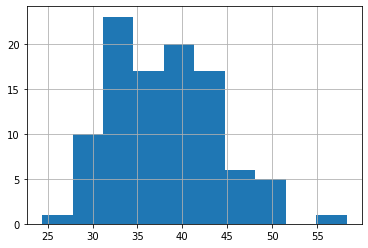

In [39]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

### E//The mean of means
You want to know what the average number of users (num_users) is per deal, but you want to know this number for the entire company so that you can see if Amir's deals have more or fewer users than the company's average deal. The problem is that over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.
**Set the random seed to 321.
Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.
Print the mean of sample_means.
Print the mean of the num_users column of amir_deals.**

In [40]:
# Set seed to 321
np.random.seed(321)
sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20,replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals.num_users))

NameError: name 'all_deals' is not defined

## 6_6.3.3// The Poisson distribution(Discrete distribution)
<u><i>**Poisson process:**</u></i>A Poisson process is a process where events appear to happen at a certain rate, but completely at random. For example, the number of animals adopted from an animal shelter each week is a Poisson process - we may know that on average there are 8 adoptions per week, but this number can differ randomly. Other examples would be the number of people arriving at a restaurant each hour, or the number of earthquakes per year in California. The time unit like, hours, weeks, or years, is irrelevant as long as it's consistent.<br>The **Poisson distribution** describes the probability of some number of events happening over a fixed period of time. We can use the Poisson distribution to calculate the probability of at least 5 animals getting adopted in a week, the probability of 12 people arriving in a restaurant in an hour, or the probability of fewer than 20 earthquakes in California in a year. Poisson distribution defined by lambda(λ) which means <i>the average number of events per time period </i> lambda is the distribution peak.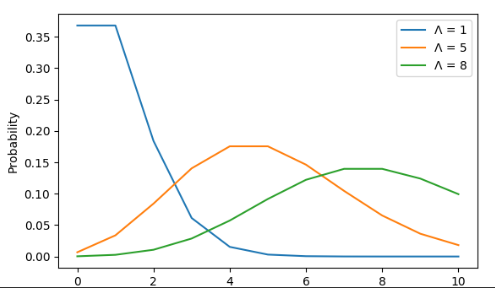 <br> .rvs,.pmf,.cdf...


#### E// Tracking lead responses
Your company uses sales software to keep track of new sales leads. It organizes them into a queue so that anyone can follow up on one when they have a bit of free time. Since the number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.
**Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.
2
Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?
3
What's the probability that Amir responds to 2 or fewer leads in a day?
4
What's the probability that Amir responds to more than 10 leads in a day?**

In [41]:
# Import poisson from scipy.stats
from scipy.stats import poisson
# Probability of 5 responses
prob_5 = poisson.pmf(5,4)
print(prob_5)
# Probability of 5 responses                      2
prob_coworker = poisson.pmf(5,5.5)
print(prob_coworker)
# Probability of 2 or fewer responses             3
prob_2_or_less = poisson.cdf(2,4)
print(prob_2_or_less)
# Probability of > 10 responses                    4
prob_over_10 = 1-poisson.cdf(10,4)

print(prob_over_10)

0.1562934518505317
0.17140068409793663
0.23810330555354436
0.0028397661205137315


## 6_6.3.4// More probability distributions
<u>**Exponential distribution:**</u>which represents the probability of a certain time passing between Poisson events. We can use the exponential distribution to predict, for example, the probability of more than 1 day between adoptions, the probability of fewer than 10 minutes between restaurant arrivals, and the probability of 6-8 months passing between earthquakes. The exponential distribution uses the same lambda value, which represents the rate, that the Poisson distribution does and also continuous.<br><u>In poisson λ=.5 request per minute. In exponential 1/λ request per two minute.</u><br>
<u>**(Student's) t-distribution:**</u>Its shape is similar to the normal distribution, but not quite the same. It has a parameter defree of freedom(df). 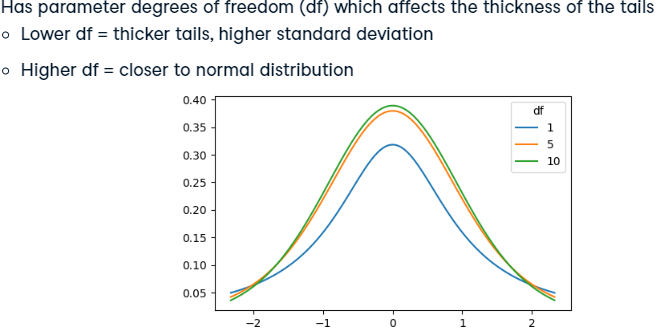 <br>
<u>**Log-normal distribution:**</u>

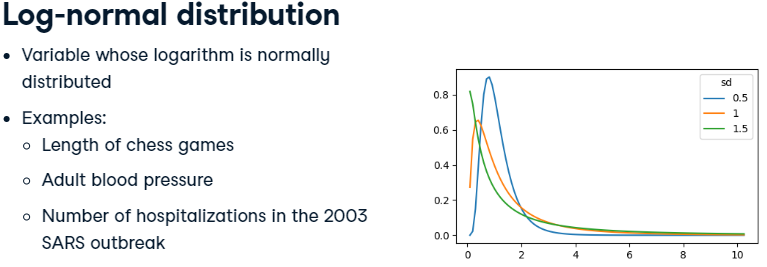

### E// Modeling time between leads
To further evaluate Amir's performance, you want to know how much time it takes him to respond to a lead after he opens it. On average, it takes 2.5 hours for him to respond. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.
**1Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead?
2
What's the probability it takes Amir more than 4 hours to respond to a lead?
3
What's the probability it takes Amir 3-4 hours to respond to a lead?**

In [42]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour     1
print(expon.cdf(1, scale=2.5))
# Print probability response takes > 4 hours    2
print(1-(expon.cdf(4,scale=2.5)))
# Print probability response takes 3-4 hours
print(expon.cdf(4,scale=2.5) - expon.cdf(3,scale=2.5))

0.3296799539643607
0.20189651799465536
0.09929769391754684


# 6_6.4//Correlation and Experimental Design
## 6_6.4.1//Correlation
df['...'].corr(df['...']). Spot on! When correlation is 0, that means there is no relationship between two variables and the points appear to be randomly scattered. positive means positive corr and neg means neg corr
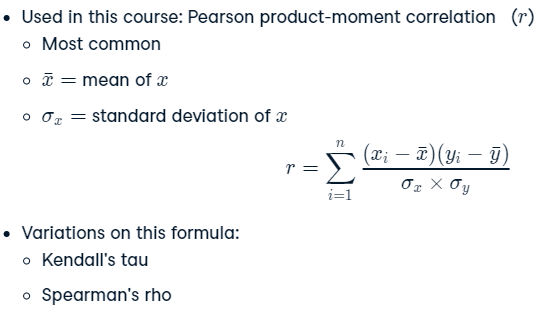

#### Relationships between variables
In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively.
**Create a scatterplot of happiness_score vs. life_exp (without a trendline) using seaborn.
Create a scatterplot of happiness_score vs. life_exp with a linear trendline using seaborn, setting ci to None.

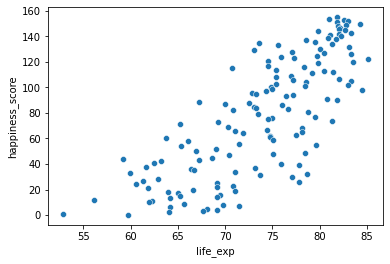

In [45]:
import seaborn as sns
world_happiness=pd.read_csv('G:\\datacamp\\6_6. Introduction to Statistics\\world_happiness.csv')
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(y='happiness_score',x='life_exp',data=world_happiness)

# Show plot
plt.show()

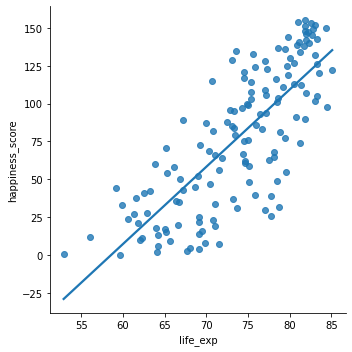

0.7802249053272062

In [48]:
sns.lmplot(y='happiness_score',x='life_exp',data=world_happiness,ci=None)
# Show plot
plt.show()

cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
cor

## 6_6.4.2//Correlation caveats
corr is generaly applicable to linear relationship. we can not measure a quadratic relationship or highly skewed graph. here corr is .31 but there is definetly a relationship. 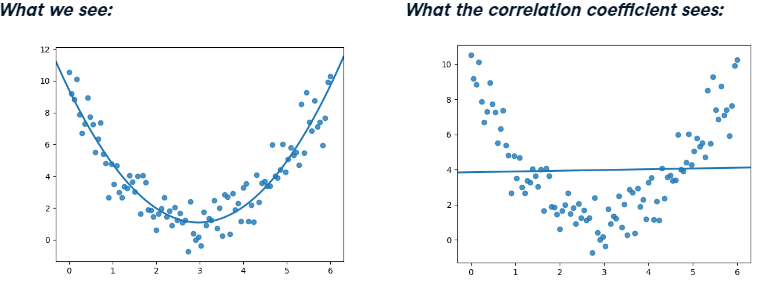
same for highly skewed data.

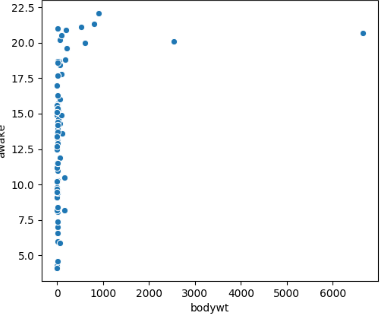
We can use log tranformation. But there are other transformations also.

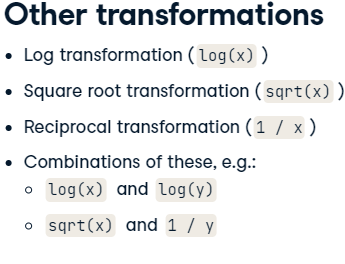
So why use a transformation? Certain statistical methods rely on variables having a linear relationship, like calculating a correlation coefficient. Linear regression is another statistical technique that requires variables to be related in a linear manner
<i>**spurious correlation:**</i>correlation does not imply causation. This means that if x and y are correlated, x doesn't necessarily cause y. <br>A phenomenon called confounding can lead to spurious correlations. Let's say we want to know if drinking coffee causes lung cancer. Looking at the data, we find that coffee drinking and lung cancer are correlated, which may lead us to think that drinking more coffee will give you lung cancer.
However, there is a third, hidden variable at play, which is smoking

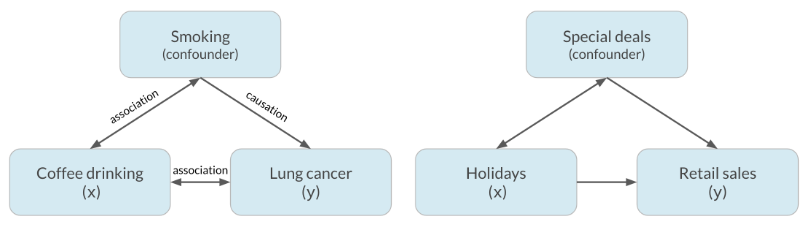

#### E//What can't correlation measure?
While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.
**Create a seaborn scatterplot (without a trendline) showing the relationship between gdp_per_cap (on the x-axis) and life_exp (on the y-axis).
2//Calculate the correlation between gdp_per_cap and life_exp and store as cor
3//The correlation between GDP per capita and life expectancy is 0.7. Why is correlation not the best way to measure the relationship between these two variables?

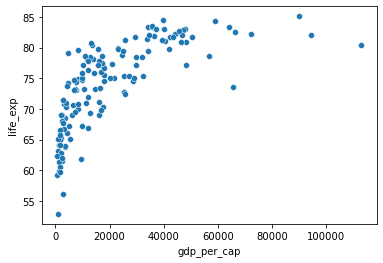

0.7019547642148012


In [49]:
# Scatterplot of gdp_per_cap and life_exp          1
sns.scatterplot(x='gdp_per_cap',y='life_exp',data=world_happiness)
# Show plot
plt.show()
# Correlation between gdp_per_cap and life_exp      2
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)
#Correlation only measures linear relationships. 3

#### E//Transforming variables
When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.
**Create a scatterplot of happiness_score versus gdp_per_cap and calculate the correlation between them.
2
Add a new column to world_happiness called log_gdp_per_cap that contains the log of gdp_per_cap.
3Create a seaborn scatterplot of log_gdp_per_cap and happiness_score and calculate the correlation between them.**

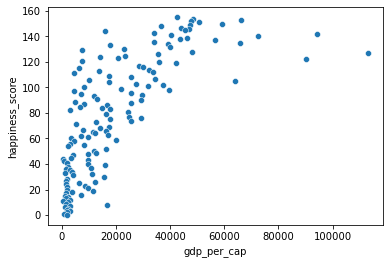

0.727973301222298


In [50]:
# Scatterplot of happiness_score vs. gdp_per_cap       1
sns.scatterplot(y='happiness_score',x='gdp_per_cap',data=world_happiness)
plt.show()

# Calculate correlation                                1
cor = world_happiness["happiness_score"].corr(world_happiness['gdp_per_cap'])
print(cor)

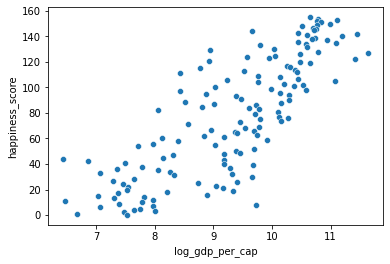

0.8043146004918288


In [51]:
# Create log_gdp_per_cap column      2
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)
## mane log kore corr kore dekhba?judge korbe je etay lavh hoise naki. visualize important

Does sugar improve happiness?
A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

In [52]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       143 non-null    int64  
 1   country          143 non-null    object 
 2   social_support   142 non-null    float64
 3   freedom          142 non-null    float64
 4   corruption       135 non-null    float64
 5   generosity       142 non-null    float64
 6   gdp_per_cap      143 non-null    int64  
 7   life_exp         143 non-null    float64
 8   happiness_score  143 non-null    int64  
 9   log_gdp_per_cap  143 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 11.3+ KB


## 6_6.4.4//Design of experiments
Often, data is created as a result of a study that aims to answer a specific question. However, data needs to be analyzed and interpreted differently depending on how the data was generated and how the study was designed.
see video(downlaoded)
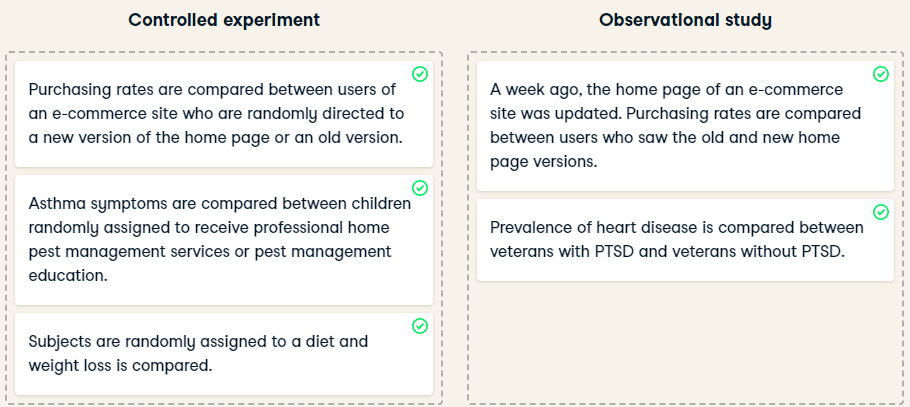

In [64]:
np.array((np.random.random,2))

array([<built-in method random of numpy.random.mtrand.RandomState object at 0x000001BF17036640>,
       2], dtype=object)

In [84]:
x=np.arange(27).reshape((9,3))
np.transpose(x)
array_1 = np.array([1, 4, 8])
array_2 = np.array([[8, 6, 4],
                    [1, 8, 0]])
array_1.reshape((1,3))
np.concatenate((array_1, array_2))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)